### K-means clustering

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

### Read the dataset

In [2]:
import pandas as pd
df = pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
df.columns = ['CustomerID','Gender','Age','Income','Spending']

In [4]:
df

,CustomerID,Gender,Age,Income,Spending
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CustomerID  200 non-null    int64 
 1   Gender      200 non-null    object
 2   Age         200 non-null    int64 
 3   Income      200 non-null    int64 
 4   Spending    200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.isna().sum()

CustomerID    0
Gender        0
Age           0
Income        0
Spending      0
dtype: int64

### Create X feature

In [7]:
X = df[['Income','Spending']]

In [8]:
X.head()

,Income,Spending
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


### Visualizing the variables

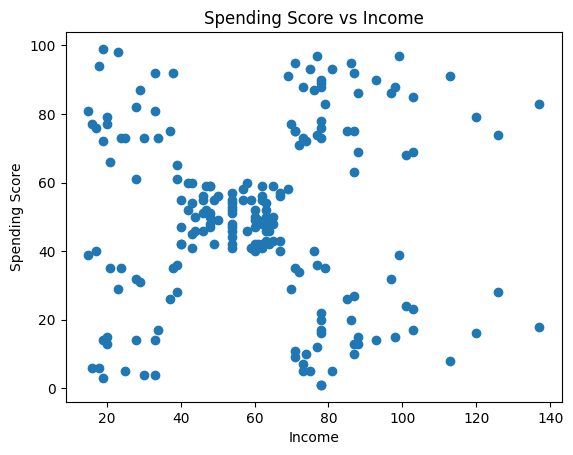

In [9]:
import matplotlib.pyplot as plt
plt.scatter(X['Income'],X['Spending'])
plt.xlabel('Income')
plt.ylabel('Spending Score')
plt.title('Spending Score vs Income')
plt.show()

### Preprocessing the X feature

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [11]:
num_pipe = Pipeline(steps=[('imputer',SimpleImputer(strategy='mean')),
                           ('scaler',StandardScaler())])

In [12]:
X_pre = num_pipe.fit_transform(X)
X_pre[0:5]

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992]])

In [13]:
cols = num_pipe.get_feature_names_out()
cols

array(['Income', 'Spending'], dtype=object)

In [14]:
X_pre = pd.DataFrame(X_pre,columns=cols)
X_pre.head()

,Income,Spending
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


### Perform elbow method for selecting optimum number of clusters

In [15]:
%pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


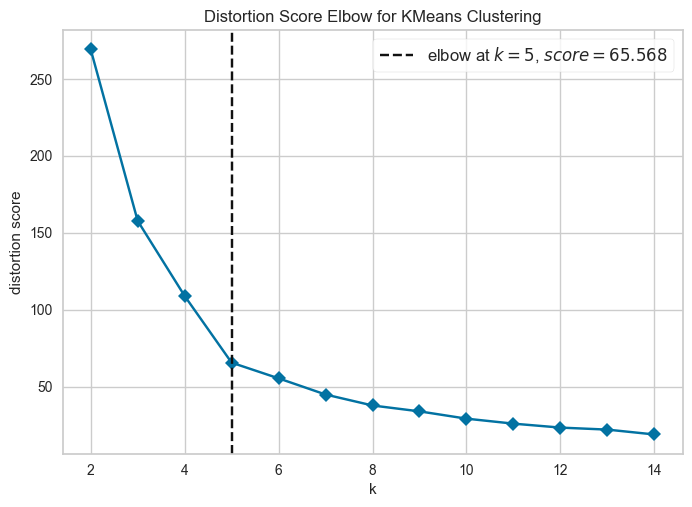

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=14), k=(2, 15), timings=False)

In [16]:
from yellowbrick.cluster.elbow import kelbow_visualizer
from sklearn.cluster import KMeans
kelbow_visualizer(KMeans(),
                  X_pre,
                  k=(2,15),
                  timings=False)

### Build The kmeans algorithm with k=5

In [17]:
km = KMeans(n_clusters=5)
km.fit(X_pre)

KMeans(n_clusters=5)

In [20]:
lb = km.labels_

In [21]:
lb

array([4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 3,
       4, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 0, 2, 3, 2, 0, 2, 0, 2,
       3, 2, 0, 2, 0, 2, 0, 2, 0, 2, 3, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [22]:
X

,Income,Spending
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


### Visualize the clusters

<Axes: xlabel='Income', ylabel='Spending'>

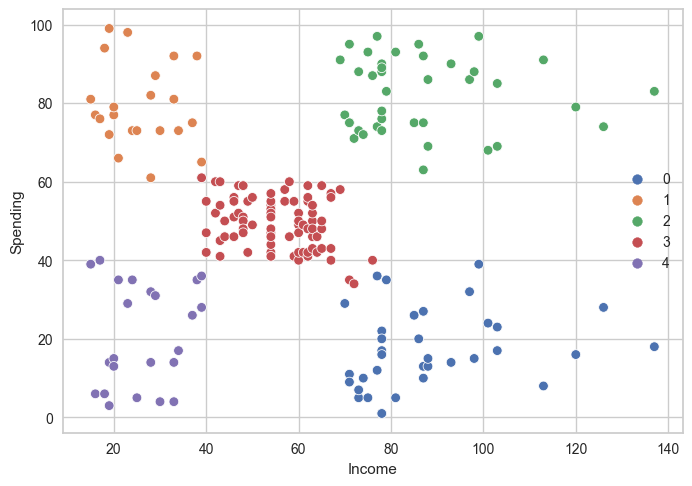

In [23]:
import seaborn as sns
sns.scatterplot(data=X,x='Income',y='Spending',hue=lb,palette='deep')


In [24]:
X['label']=lb

In [25]:
X

,Income,Spending,label
0,15,39,4
1,15,81,1
2,16,6,4
3,16,77,1
4,17,40,4
...,...,...,...
195,120,79,2
196,126,28,0
197,126,74,2
198,137,18,0


In [26]:
X[X['label']==0]

,Income,Spending,label
124,70,29,0
128,71,11,0
130,71,9,0
134,73,5,0
136,73,7,0
138,74,10,0
140,75,5,0
144,77,12,0
146,77,36,0
148,78,22,0


In [28]:
X[X['label']==1]

,Income,Spending,label
1,15,81,1
3,16,77,1
5,17,76,1
7,18,94,1
9,19,72,1
11,19,99,1
13,20,77,1
15,20,79,1
17,21,66,1
19,23,98,1


In [29]:
X[X['label']==2]

,Income,Spending,label
123,69,91,2
125,70,77,2
127,71,95,2
129,71,75,2
131,71,75,2
133,72,71,2
135,73,88,2
137,73,73,2
139,74,72,2
141,75,93,2


In [30]:
X[X['label']==3]

,Income,Spending,label
43,39,61,3
46,40,55,3
47,40,47,3
48,40,42,3
49,40,42,3
...,...,...,...
121,67,40,3
122,69,58,3
126,71,35,3
132,72,34,3


In [31]:
X[X['label']==4]

,Income,Spending,label
0,15,39,4
2,16,6,4
4,17,40,4
6,18,6,4
8,19,3,4
10,19,14,4
12,20,15,4
14,20,13,4
16,21,35,4
18,23,29,4


In [33]:
income = float(input('Please Enter income in 1000s of USD : '))
spending = int(input('Please Enter Spending Score (1-100) :'))
xnew = pd.DataFrame([income,spending]).T
xnew.columns = cols
xnew_pre = num_pipe.transform(xnew)
xnew_pre = pd.DataFrame(xnew_pre,columns=cols)
pred_lb = km.predict(xnew_pre)
print(pred_lb)

[4]


### Take 3 criteria : Age, Income, Spending

In [34]:
X2 = df[['Age','Income','Spending']]
X2.head()

,Age,Income,Spending
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


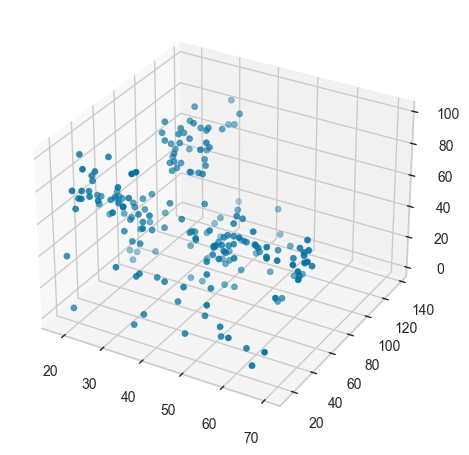

In [35]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.axes(projection='3d')

x = X2['Age']
y = X2['Income']
z = X2['Spending']

ax.scatter(x,y,z)

plt.show()

### Create preprocessing pipeline

In [36]:
num_pipe2 = Pipeline(steps=[('imputer',SimpleImputer(strategy='mean')),
                            ('scaler',StandardScaler())])

In [37]:
X2_pre = num_pipe2.fit_transform(X2)
X2_pre[0:5]

array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992]])

In [40]:
cols2 = num_pipe2.get_feature_names_out()
cols2

array(['Age', 'Income', 'Spending'], dtype=object)

In [41]:
X2_pre = pd.DataFrame(X2_pre,columns=cols2)
X2_pre

,Age,Income,Spending
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980
...,...,...,...
195,-0.276302,2.268791,1.118061
196,0.441365,2.497807,-0.861839
197,-0.491602,2.497807,0.923953
198,-0.491602,2.917671,-1.250054


### Apply elbow method 

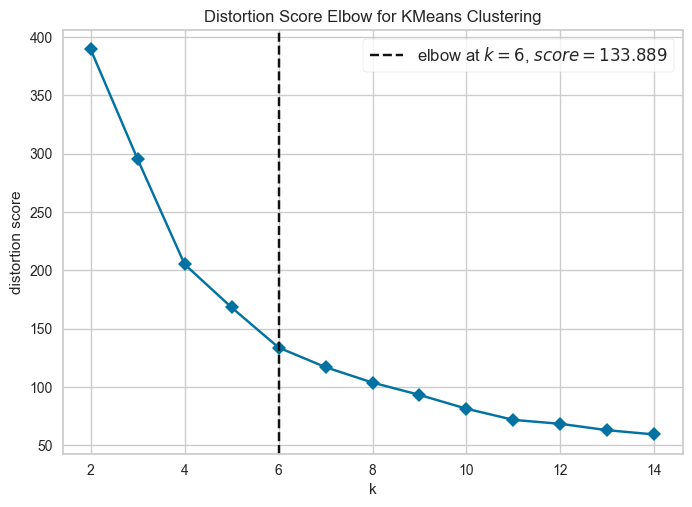

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=14), k=(2, 15), timings=False)

In [42]:
kelbow_visualizer(KMeans(),
                  X2_pre,
                  k=(2,15),
                  timings=False)

### Create Kmeans final model

In [43]:
km2 = KMeans(n_clusters=6)
km2.fit(X2_pre)

KMeans(n_clusters=6)

In [44]:
lb2 = km2.labels_
lb2

array([0, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0,
       5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 1, 0, 5, 4,
       5, 0, 1, 4, 4, 4, 1, 4, 4, 1, 1, 1, 1, 1, 4, 1, 1, 4, 1, 1, 1, 4,
       1, 1, 4, 4, 1, 1, 1, 1, 1, 4, 1, 4, 4, 1, 1, 4, 1, 1, 4, 1, 1, 4,
       4, 1, 1, 4, 1, 4, 4, 4, 1, 4, 1, 4, 4, 1, 1, 4, 1, 4, 1, 1, 1, 1,
       1, 4, 4, 4, 4, 4, 1, 1, 1, 1, 4, 4, 4, 3, 4, 3, 2, 3, 2, 3, 2, 3,
       4, 3, 2, 3, 2, 3, 2, 3, 2, 3, 4, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 1, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3])

In [48]:
X2['label']=lb2

In [49]:
X2

,Age,Income,Spending,label
0,19,15,39,0
1,21,15,81,0
2,20,16,6,5
3,23,16,77,0
4,31,17,40,5
...,...,...,...,...
195,35,120,79,3
196,45,126,28,2
197,32,126,74,3
198,32,137,18,2


In [45]:
list(range(6))

[0, 1, 2, 3, 4, 5]

In [50]:
for i in range(6):
    print(f'Cluster No : {i}')
    display(X2[X2['label']==i])
    print('\n========================================================\n')

Cluster No : 0


,Age,Income,Spending,label
0,19,15,39,0
1,21,15,81,0
3,23,16,77,0
5,22,17,76,0
7,23,18,94,0
9,30,19,72,0
11,35,19,99,0
13,24,20,77,0
15,22,20,79,0
17,20,21,66,0




Cluster No : 1


,Age,Income,Spending,label
40,65,38,35,1
46,50,40,55,1
50,49,42,52,1
53,59,43,60,1
54,50,43,45,1
55,47,43,41,1
56,51,44,50,1
57,69,44,46,1
59,53,46,46,1
60,70,46,56,1




Cluster No : 2


,Age,Income,Spending,label
126,43,71,35,2
128,59,71,11,2
130,47,71,9,2
134,20,73,5,2
136,44,73,7,2
138,19,74,10,2
140,57,75,5,2
144,25,77,12,2
146,48,77,36,2
148,34,78,22,2




Cluster No : 3


,Age,Income,Spending,label
123,39,69,91,3
125,31,70,77,3
127,40,71,95,3
129,38,71,75,3
131,39,71,75,3
133,31,72,71,3
135,29,73,88,3
137,32,73,73,3
139,35,74,72,3
141,32,75,93,3




Cluster No : 4


,Age,Income,Spending,label
43,31,39,61,4
47,27,40,47,4
48,29,40,42,4
49,31,40,42,4
51,33,42,60,4
52,31,43,54,4
58,27,46,51,4
61,19,46,55,4
65,18,48,59,4
68,19,48,59,4




Cluster No : 5


,Age,Income,Spending,label
2,20,16,6,5
4,31,17,40,5
6,35,18,6,5
8,64,19,3,5
10,67,19,14,5
12,58,20,15,5
14,37,20,13,5
16,35,21,35,5
18,52,23,29,5
20,35,24,35,5


In [52]:
def plotcolor(arr):
    color = []
    for i in arr:
        if i==0:
            color.append('red')
        elif i==1:
            color.append('green')
        elif i==2:
            color.append('blue')
        elif i==3:
            color.append('yellow')
        elif i==4:
            color.append('orange')
        else:
            color.append('violet')
    return color

In [55]:
cl = plotcolor(lb2)
print(cl)

['red', 'red', 'violet', 'red', 'violet', 'red', 'violet', 'red', 'violet', 'red', 'violet', 'red', 'violet', 'red', 'violet', 'red', 'violet', 'red', 'violet', 'red', 'violet', 'red', 'violet', 'red', 'violet', 'red', 'violet', 'red', 'violet', 'red', 'violet', 'red', 'violet', 'red', 'violet', 'red', 'violet', 'red', 'violet', 'red', 'green', 'red', 'violet', 'orange', 'violet', 'red', 'green', 'orange', 'orange', 'orange', 'green', 'orange', 'orange', 'green', 'green', 'green', 'green', 'green', 'orange', 'green', 'green', 'orange', 'green', 'green', 'green', 'orange', 'green', 'green', 'orange', 'orange', 'green', 'green', 'green', 'green', 'green', 'orange', 'green', 'orange', 'orange', 'green', 'green', 'orange', 'green', 'green', 'orange', 'green', 'green', 'orange', 'orange', 'green', 'green', 'orange', 'green', 'orange', 'orange', 'orange', 'green', 'orange', 'green', 'orange', 'orange', 'green', 'green', 'orange', 'green', 'orange', 'green', 'green', 'green', 'green', 'green'

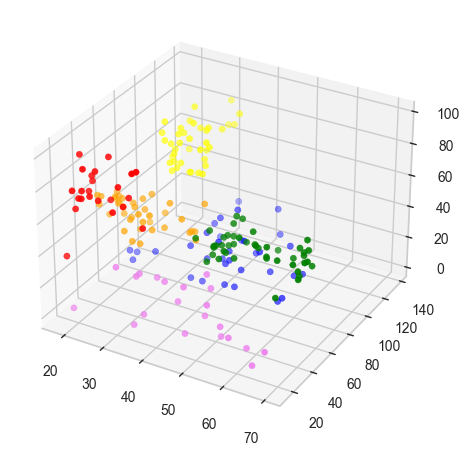

In [56]:
fig = plt.figure()
ax = plt.axes(projection='3d')

x = X2['Age']
y = X2['Income']
z = X2['Spending']

ax.scatter(x,y,z,c=cl)

plt.show()

### Predicting new customer

In [57]:
age = int(input('Please Enter your age :'))
income = float(input('Please enter income in 1000s of USD : '))
spending = int(input('Please Enter Spending Score (1-100) : '))
xnew = pd.DataFrame([age,income,spending]).T
xnew.columns=cols2
xnew_pre = num_pipe2.transform(xnew)
xnew_pre = pd.DataFrame(xnew_pre,columns=cols2)
pred = km2.predict(xnew_pre)
pred

array([3])